In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)

    #le = LabelEncoder()
    # Cobvert target label to numerical Data
    #df['bank_account'] = le.fit_transform(df['bank_account'])

    return df

In [ ]:
#Load files into a pandas dataframe
train = wrangle("Train.csv")
test = wrangle("Test.csv")
sample = wrangle("SampleSubmission.csv")
variables = wrangle("VariableDefinitions.csv")

# The target values have been converted into numerical datatypes, where 1 denotes 'Yes' and 0 denotes 'No'.

In [ ]:
le = LabelEncoder()
# Cobvert target label to numerical Data
train["bank_account"] = le.fit_transform(train["bank_account"])

In [ ]:
print(train.info())
print(train.shape)
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  int64 
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(4), object(9)
memory usage: 2.3+ MB
None
(23524, 13)


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
print(test.info())
print(test.shape)
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB
None
(10086, 12)


,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [ ]:
# Check for missing values
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [ ]:
train["bank_account"].value_counts()

0    20212
1     3312
Name: bank_account, dtype: int64

# Explore the Train Data


In [ ]:
# Create correlation matrix
correlation = train.select_dtypes("number").drop(columns="bank_account").corr()
correlation

,year,household_size,age_of_respondent
year,1.000000,-0.052264,-0.019330
household_size,-0.052264,1.000000,-0.129729
age_of_respondent,-0.019330,-0.129729,1.000000


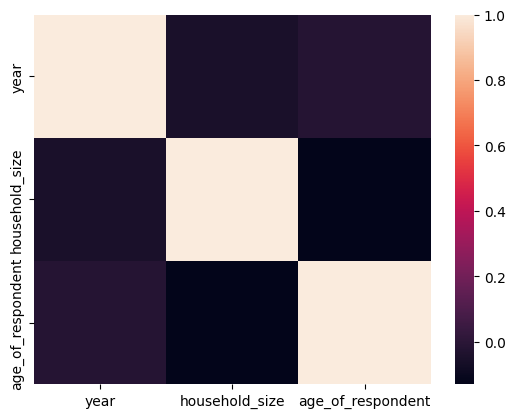

In [ ]:
# Plot heatmap of `correlation`
sns.heatmap(correlation);

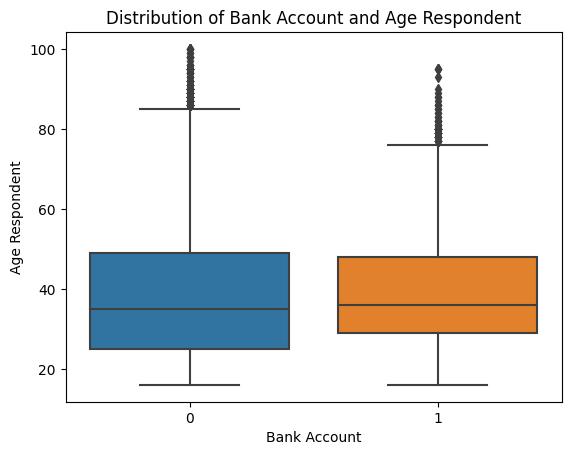

In [ ]:
# Create boxplot
sns.boxplot(x="bank_account", y="age_of_respondent", data=train)
# Label axes
plt.xlabel("Bank Account")
plt.ylabel("Age Respondent")
plt.title("Distribution of Bank Account and Age Respondent");

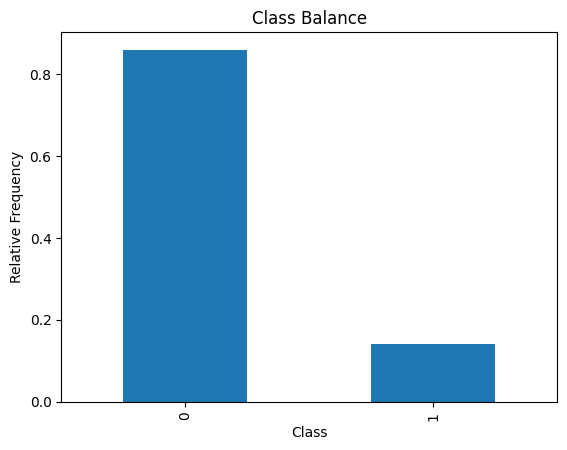

In [ ]:
# Plot value counts of `"bank_account"`
train["bank_account"].value_counts(normalize=True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
);

In [ ]:
majority_class_prop, minority_class_prop = train["bank_account"].value_counts(normalize=True)
print(majority_class_prop, minority_class_prop)

0.859207617752083 0.14079238224791701


In [ ]:
# Create pivot table
Education_level_pivot = pd.pivot_table(
    train, index="education_level", values="bank_account", aggfunc=np.mean
).sort_values(by="bank_account")
Education_level_pivot

,bank_account
education_level,
No formal education,0.038981
Primary education,0.085451
Secondary education,0.232773
Other/Dont know/RTA,0.314286
Tertiary education,0.510804
Vocational/Specialised training,0.570361


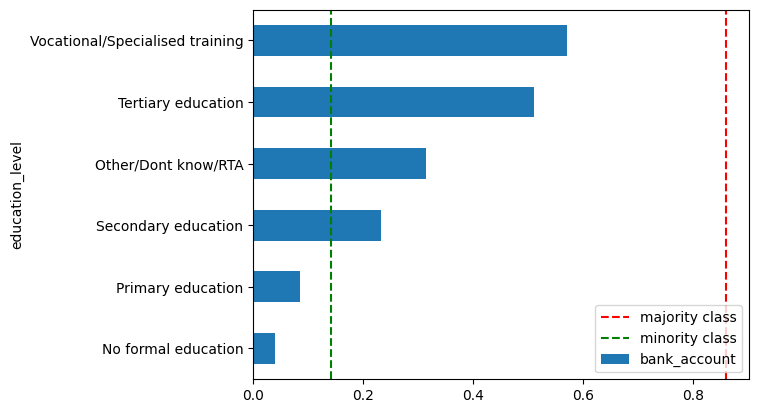

In [ ]:
# Plot bar chart of `Education_level_pivot`
Education_level_pivot.plot(kind="barh")
plt.axvline(
    majority_class_prop, linestyle="--", color="red", label="majority class"
)
plt.axvline(
    minority_class_prop, linestyle="--", color="green", label="minority class"
)
plt.legend(loc="lower right");

# Create your feature matrix X and target vector y. The target is "Bank_Acctount"

In [ ]:
# Split¶ Train Data into two
target = "bank_account"
X = train.drop(columns=target)
y = train[target]

In [ ]:
# Check split work
assert X.shape == (23524, 12), f"The shape of `X` should be (23524, 13), not {X.shape}."
assert y.shape == (23524,), f"The shape of `y` should be (23524,), not {y.shape}."

# The data divided (X and y) into training and test sets using a randomized train-test split.The test set should be 10% of the total data. And set a random_state for reproducibility

In [ ]:
# Split train_data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (21171, 12)
y_train shape: (21171,)
X_test shape: (2353, 12)
y_test shape: (2353,)


In [ ]:
# Check your work
assert X_train.shape == (
    21171,
    12,
), f"The shape of `X_train` should be (21171, 12), not {X_train.shape}."
assert y_train.shape == (
    21171,
), f"The shape of `y_train` should be (21171,), not {y_train.shape}."
assert X_test.shape == (
    2353,
    12,
), f"The shape of `X_test` should be (2353, 12), not {X_test.shape}."
assert y_test.shape == (
    2353,
), f"The shape of `y_test` should be (14168,), not {y_test.shape}."

# The training data (X_train and y_train) into training and validation sets using a randomized train-test split.The validation data should be 10% of the remaining data.set a random_state.

In [ ]:
X_train, X_val, y_train, y_val =train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (19053, 12)
y_train shape: (19053,)
X_val shape: (2118, 12)
y_val shape: (2118,)


# Build Model
Baseline

In [ ]:
# Calculate the baseline accuracy score for the model.
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.86


# Creation of a pipeline named model that contains a OrdinalEncoder transformer and a DecisionTreeClassifier predictor. ( set a random_state for the predictor.) Then fit the model to the training data.

In [ ]:
# Build Model
model = make_pipeline(
    OrdinalEncoder(), DecisionTreeClassifier(random_state=42)
)
# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['country', 'uniqueid', 'location_type',
                                      'cellphone_access',
                                      'gender_of_respondent',
                                      'relationship_with_head',
                                      'marital_status', 'education_level',
                                      'job_type'],
                                mapping=[{'col': 'country',
                                          'data_type': dtype('O'),
                                          'mapping': Kenya       1
Rwanda      2
Tanzania    3
Uganda      4
NaN        -2
dtype: int64},
                                         {'col': 'uniqueid',
                                          'data_type': dtype('O...
Other/Dont know/RTA                6
NaN                               -2
dtype: int64},
                                         {'col': 'job_type',
                                          'data_type': dtype('O'),
                                          'mapping': Formally employed Private        1
Farming and Fishing              2
Self employed                    3
Informally employed              4
Remittance Dependent             5
No Income                        6
Other Income                     7
Formally employed Government     8
Government Dependent             9
Dont Know/Refuse to answer      10
NaN                             -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [ ]:
# Check work
assert isinstance(
    model, Pipeline
), f"`model` should be a Pipeline, not type {type(model)}."
assert isinstance(
    model[0], OrdinalEncoder
), f"The first step in your Pipeline should be an OrdinalEncoder, not type {type(model[0])}."
assert isinstance(
    model[-1], DecisionTreeClassifier
), f"The last step in your Pipeline should be an DecisionTreeClassifier, not type {type(model[-1])}."
check_is_fitted(model)

In [ ]:
# The Calculation of the training and validation accuracy scores for the models.
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val =model.score(X_val, y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 1.0
Validation Accuracy: 0.81


# Use the get_depth method on the DecisionTreeClassifier in the model to see how deep your tree grew during training.

In [ ]:
# Access an object in a pipeline in scikit-learn.
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 38


# The max_depth hyperparameter of your model's DecisionTreeClassifier should have a range of possible values that you create. The depth_hyperparams should range from 1 to 50 with steps of 2.

In [ ]:
depth_hyperparams = range(1, 50, 2)

# A model is trained for each possible max_depth in the depth_hyperparams array. When a new model is being trained, the code should also be calculating the training and validation accuracy scores and adding those values to the training_acc and validation_acc lists, respectively. This should happen every time a new model is being trained.

In [ ]:
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(
         OrdinalEncoder(), DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train, y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val, y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.8618590248254868, 0.878076943263528, 0.8829055791738833]
Validation Accuracy Scores: [0.876770538243626, 0.8899905571293674, 0.8871576959395656]


In [ ]:
# Check work
assert (
    len(training_acc) == 25
), f"`training_acc` should contain 25 items, not {len(training_acc)}."
assert (
    len(validation_acc) == 25
), f"`validation_acc` should contain 25 items, not {len(validation_acc)}."

# Two lines were used in the creation of the visualization. The values of training_acc ought to be plotted as a function of depth_hyperparams on the first line, and the values of validation_acc ought to be plotted as a function of depth_hyperparams on the second line. "Max Depth" should be labeled on the x-axis, and "Accuracy Score" should be placed on the y-axis. In addition to this, you should provide a legend to help your viewers differentiate between the two lines.

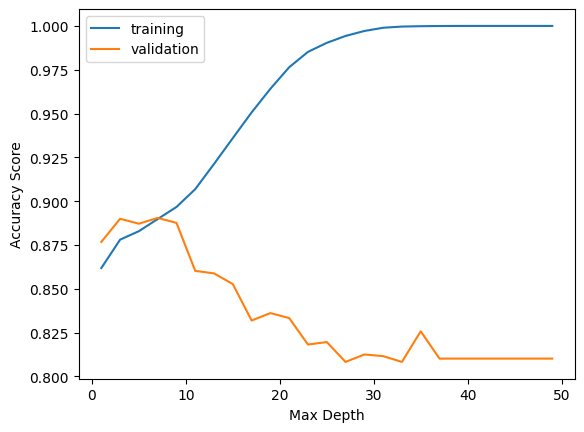

In [ ]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc, label="training")
plt.plot(depth_hyperparams, validation_acc, label="validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();

# Choose the max_depth number that results in the highest validation accuracy score based on the visualization. After that, you should retrain your initial model using the new max_depth number. Lastly, calculate the test accuracy score that will be below to see how well the tweaked model performs on the test set. Were you successful in resolving the overfitting issue by utilizing this modified max_depth?

In [ ]:
test_acc = model.score(X_test, y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.8


# if you want to utilize the plot_tree function from scikit-learn, use the code below.Figure out how to depict the decision-making process behind the model.

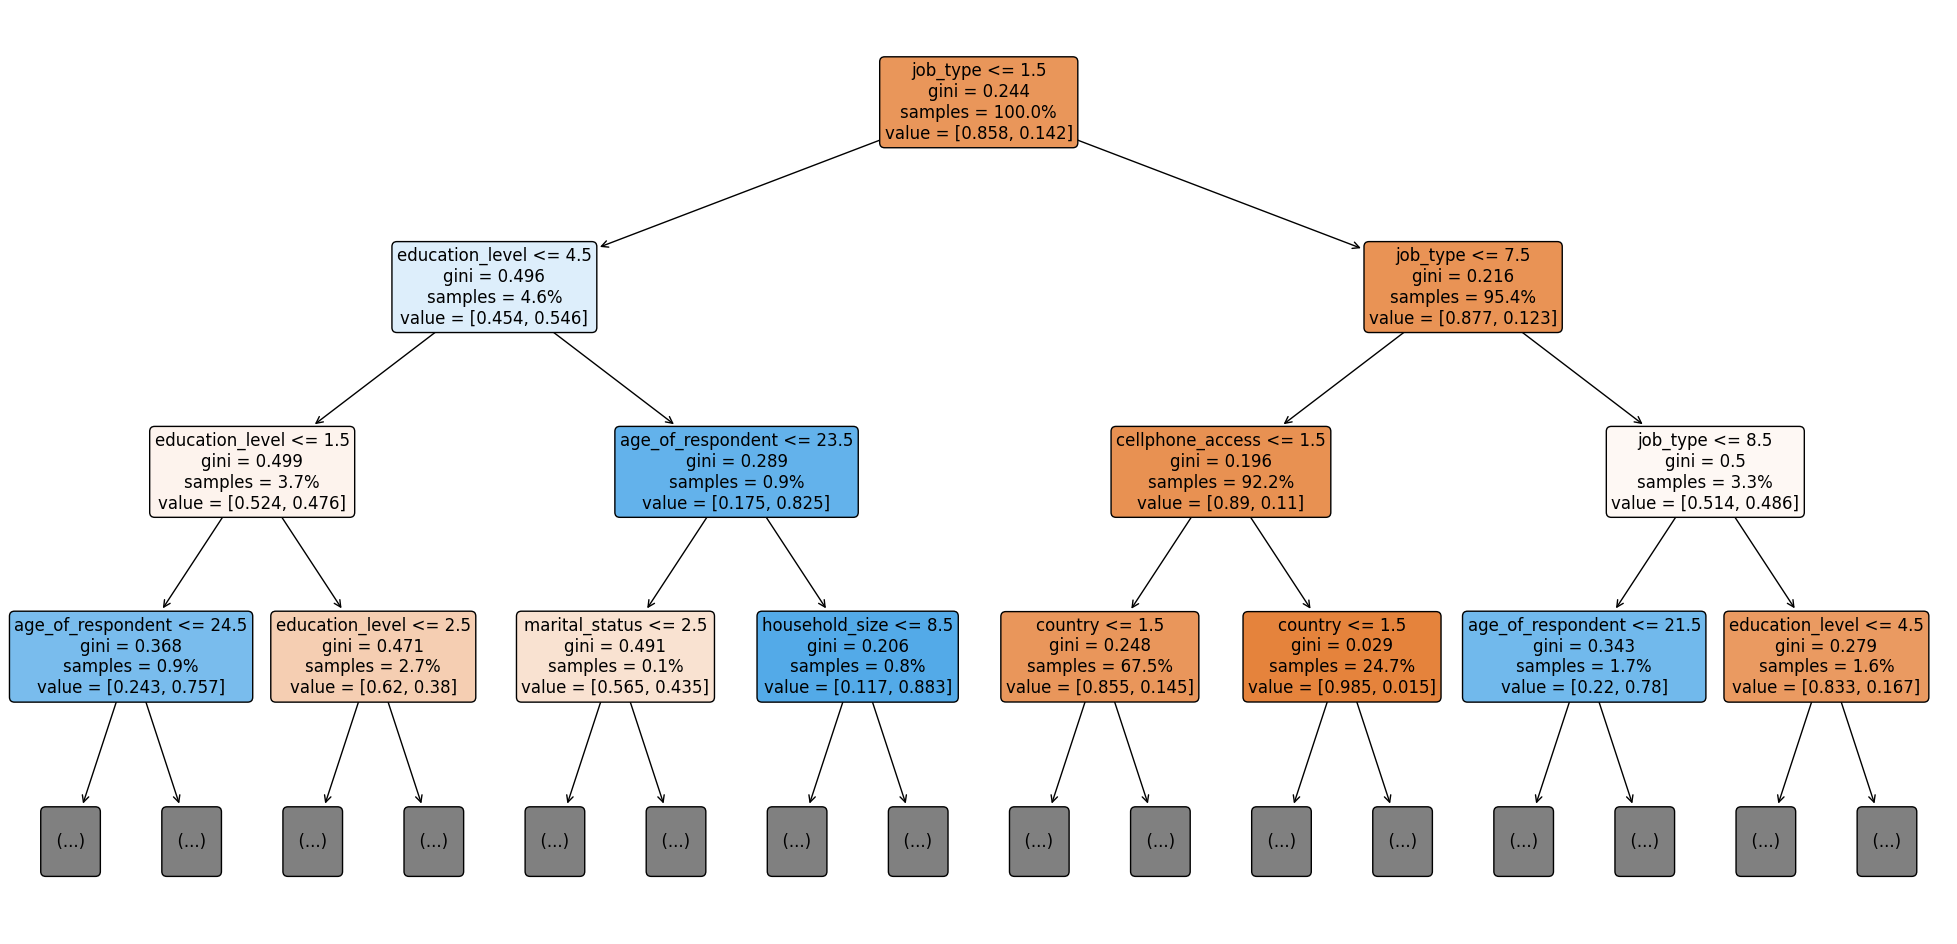

In [ ]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

# Put the names of the features and their relative importance in the model into the corresponding slots below.  your training set's column names can provide you with the features you need. Accessing the feature_importances_ attribute of your model's DecisionTreeClassifier is how you determine the importance of something.

In [ ]:
features = X_train.columns
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:5])
print("Importances:", importances[:5])

Features: Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access'], dtype='object')
Importances: [0.03359392 0.01094215 0.31370266 0.02410059 0.0274789 ]


In [ ]:
# Check your work
assert len(features) == 12, f"`features` should contain 11 items, not {len(features)}."
assert (
    len(importances) == 12
), f"`importances` should contain 11 items, not {len(importances)}."

# The creation of a new pandas Series that will be known as feat_imp, with features serving as the index and importances serving as the values. The Series ought to be ordered from least significant to most significant in importance.

In [ ]:
# Create a Series in pandas.
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.head()

year                      0.010942
gender_of_respondent      0.016823
location_type             0.024101
relationship_with_head    0.027106
cellphone_access          0.027479
dtype: float64

# The feat_imp features are incorporated into a horizontal bar chart that is created. Be remember to call your x-axis "Gini Importance"

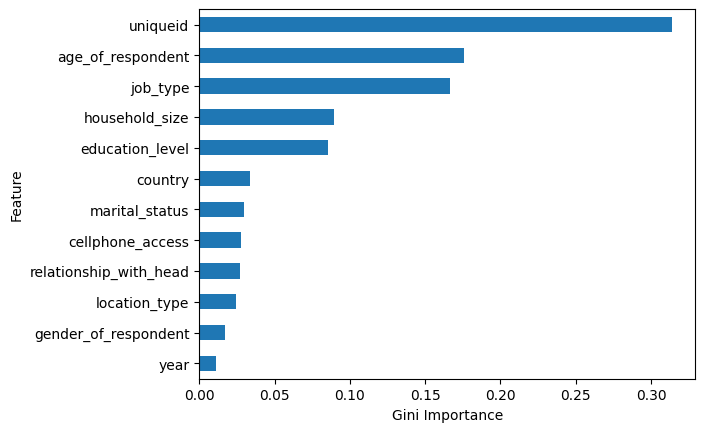

In [ ]:
# Create horizontal bar chart
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature");

# Create a new Series in Pandas and give it the name odds_ratios. The index should be features, and the values should be the exponential of the importances.

In [ ]:
odds_ratios = pd.Series(np.exp(importances), index=features).sort_values()
odds_ratios.head()

year                      1.011002
gender_of_respondent      1.016966
location_type             1.024393
relationship_with_head    1.027477
cellphone_access          1.027860
dtype: float64

# Make a bar chart that is horizontal and uses the five greatest coefficients from the odds_ratios dataset. Make sure that the term "Odds Ratio" is labeled on your x-axis.

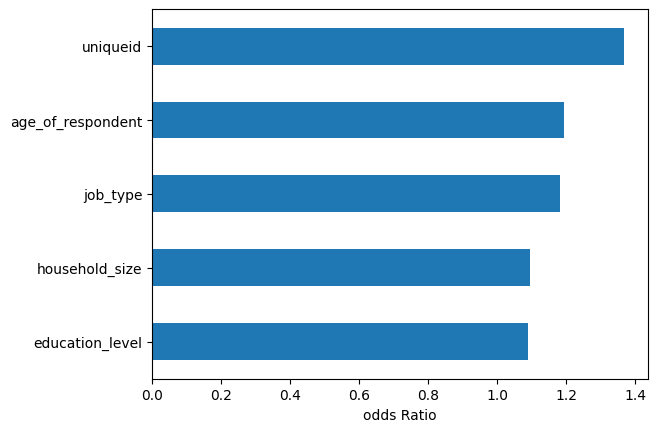

In [ ]:
# Horizontal bar chart, five largest coefficients
odds_ratios.tail().plot(kind="barh")
plt.xlabel("odds Ratio");

# Produce a bar chart that is horizontal and uses the five coefficients from odds_ratios that are the least. Make sure that the term "Odds Ratio" is labeled on your x-axis.

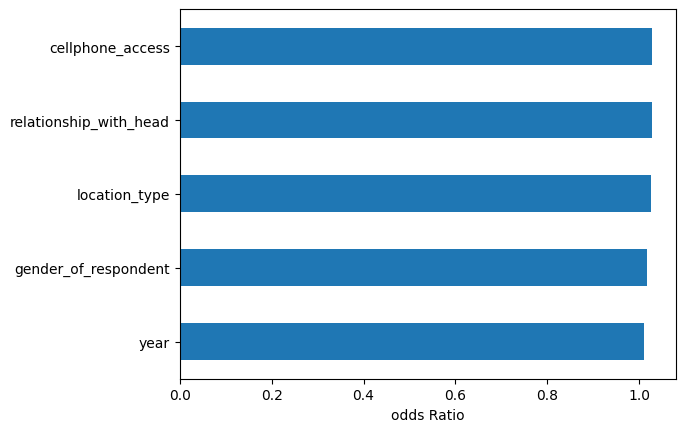

In [ ]:
# Horizontal bar chart, five smallest coefficients
odds_ratios.head().plot(kind="barh")
plt.xlabel("odds Ratio");

In [ ]:
# Get the predicted result for the test Data
test_bank_account = model.predict(test)

In [ ]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test_bank_account})

In [ ]:
#show the six sample
submission.sample(6)

,uniqueid,bank_account
5861,uniqueid_11996 x Rwanda,1
6321,uniqueid_12456 x Rwanda,0
6237,uniqueid_12372 x Rwanda,0
9307,uniqueid_2224 x Uganda,0
6532,uniqueid_6807 x Tanzania,1
9792,uniqueid_2709 x Uganda,0


In [ ]:
# Create submission csv file csv file
submission.to_csv('My_first_submission.csv', index = False)